# GLBL 5010 - Assignment 1

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk1_convergence.csv?raw=true'
df = pd.read_csv(url, sep='\t')

## Task 1

In [ ]:
# Calculate average annual growth rates and add as a new column

gdp60 = df['gdppc1960']
gdp00 = df['gdppc2000']
n = 2000-1960
g = np.log(gdp00/gdp60)/n

df['growth'] = g

Text(0, 0.5, 'Number of Countries')

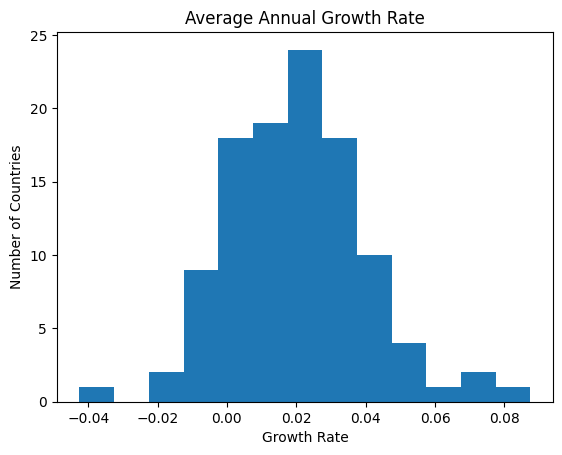

In [ ]:
# Display a histogram of the growth rates

plt.hist(g,bins=np.arange(np.min(g),np.max(g)+0.01,0.01))
plt.title("Average Annual Growth Rate")
plt.xlabel("Growth Rate")
plt.ylabel("Number of Countries")

## Task 2

In [125]:
# Calculate and print percentiles of the growth rates

print(f"The percentiles of the growth rates are:\n\t10th: {np.nanpercentile(g,10):.2g} \
      \n\t25th: {np.nanpercentile(g,25):.2g}\n\t50th: {np.nanpercentile(g,50):.2g}\n\t75th: {np.nanpercentile(g,75):.2g} \
      \n\t90th: {np.nanpercentile(g,90):.2g}")

The percentiles of the growth rates are:
	10th: -0.0031       
	25th: 0.0061
	50th: 0.019
	75th: 0.032       
	90th: 0.044


## Task 3

In [ ]:
# Identify and print the countries with the highest and smallest growth rates

print('Highest 3 growth rates:')
print(df.dropna().sort_values('growth')[['code','growth']].tail(3))
print('\t')
print('Smallest 3 growth rates:')
print(df.dropna().sort_values('growth')[['code','growth']].head(3))

Highest 3 growth rates:
    code    growth
85   KOR  0.074607
24   BWA  0.076765
103  MLT  0.084839
	
Smallest 3 growth rates:
    code    growth
32   COD -0.042519
115  NGA -0.018859
114  NER -0.016527


## Task 4

Text(0.5, 1.0, 'Growth vs Initial GDP per capita')

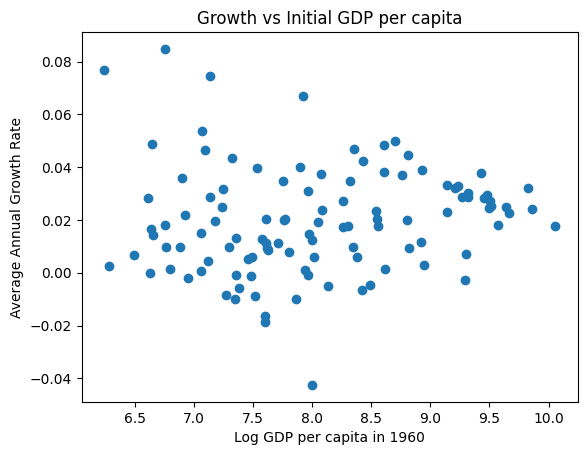

In [ ]:
# Scatter plot of growth rates vs initial GDP per capita

plt.scatter(np.log(gdp60), g)
plt.xlabel('Log GDP per capita in 1960')
plt.ylabel('Average Annual Growth Rate')
plt.title('Growth vs Initial GDP per capita')

## Task 5

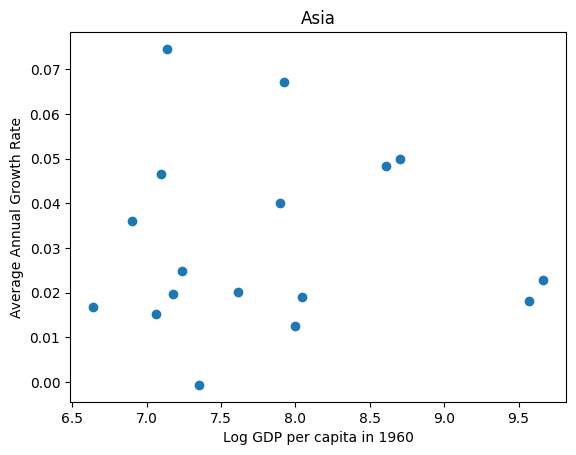

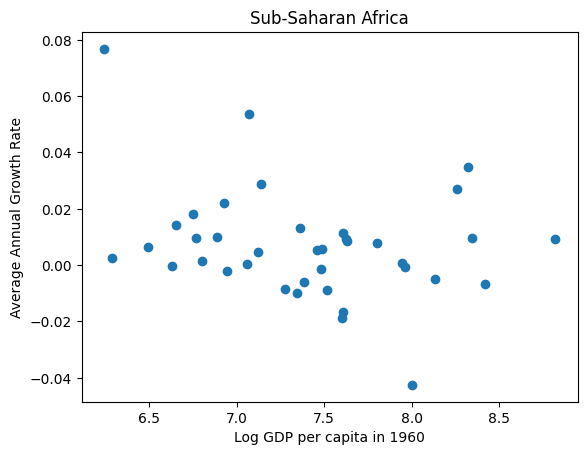

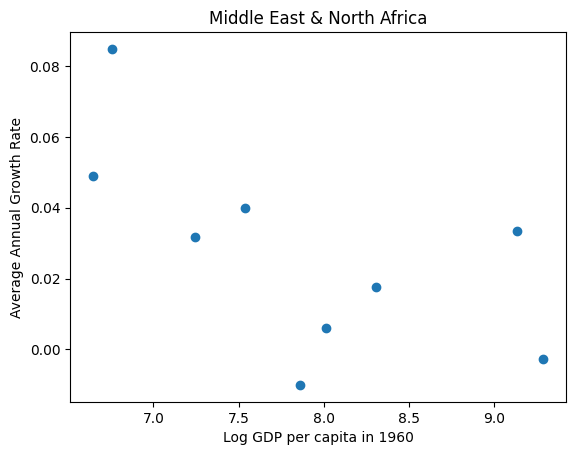

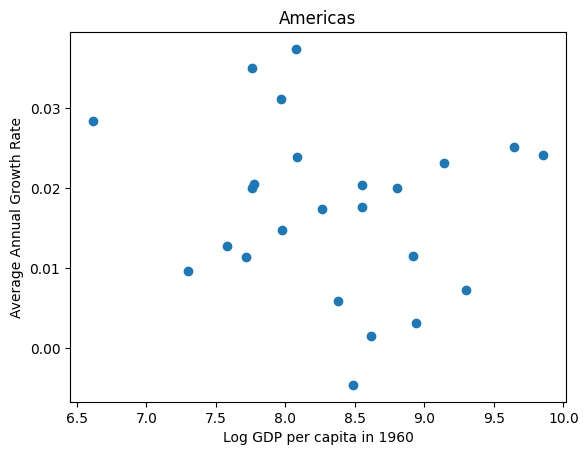

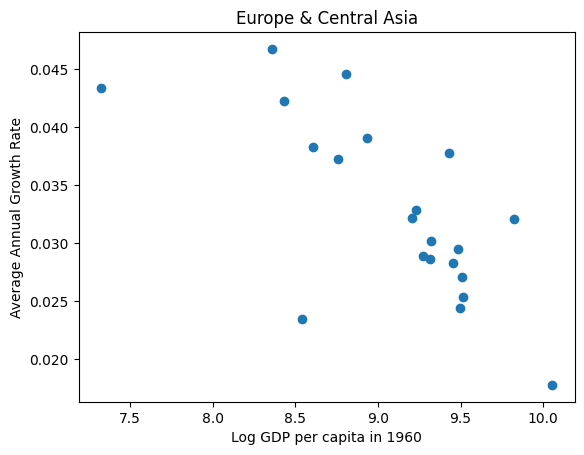

In [126]:
# Scatter plots of gdppc1960 and growth rates by region

for r in df['region'].unique():
    plt.scatter(np.log(df[df['region']==r]['gdppc1960']), df[df['region']==r]['growth'])
    plt.title(r)
    plt.xlabel('Log GDP per capita in 1960')
    plt.ylabel('Average Annual Growth Rate')
    plt.show()

## Task 6

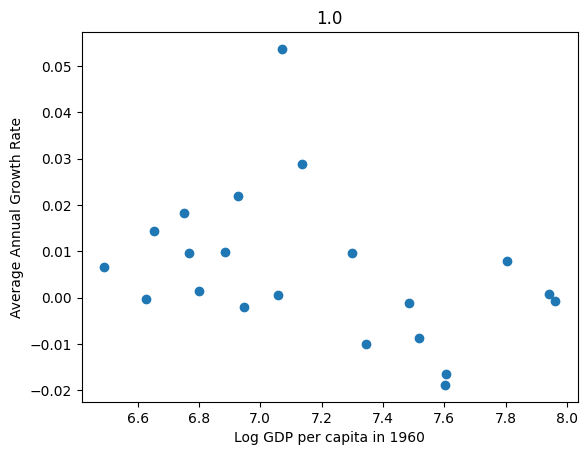

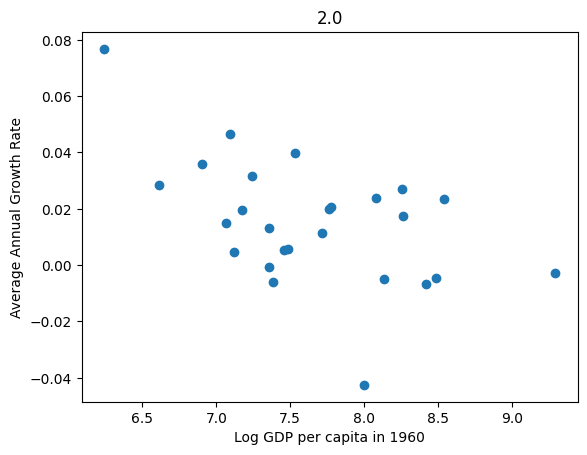

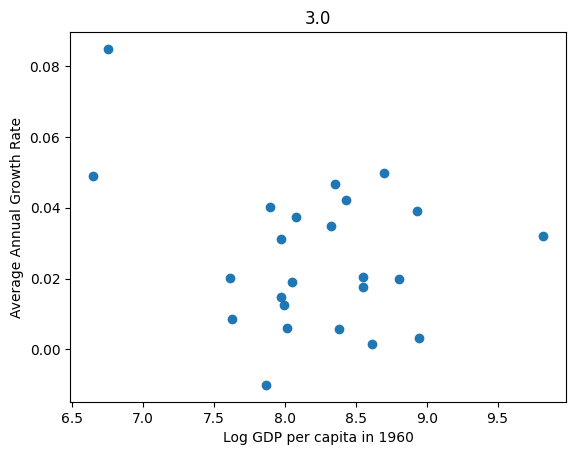

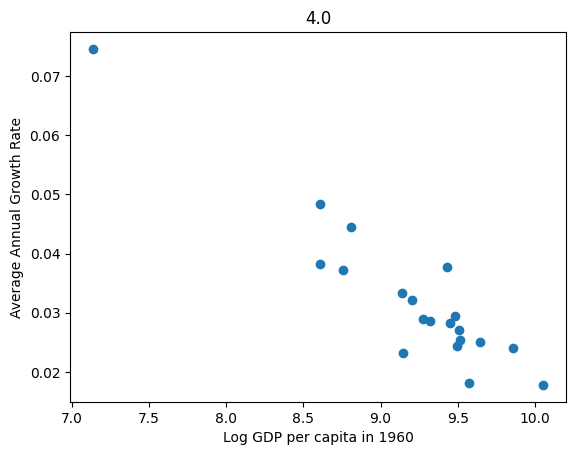

In [ ]:
# Scatter plots of gdppc1960 and growth rates by education quartiles

df['quartile'] = pd.qcut(df['edu1960'], 4, labels=False) + 1
df = df.sort_values('quartile')

for q in df['quartile'].dropna().unique():
    plt.scatter(np.log(df[df['quartile']==q]['gdppc1960']), df[df['quartile']==q]['growth'])
    plt.title(q)
    plt.xlabel('Log GDP per capita in 1960')
    plt.ylabel('Average Annual Growth Rate')
    plt.show()